## Mini-Project : W2_D5

### Data Analysis for Marketing Strategy

### Exploratory Data Analysis (EDA)

#### Step 1: Load and Preprocess the Dataset

In [3]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set default plot styles
sns.set_style("whitegrid") 
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
# Disable warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

#### Step 2: Load and Inspect the Dataset

In [6]:
# Load the dataset
df = pd.read_excel('US_superstore_data.xls')
print("Dataset loaded successfully")

Dataset loaded successfully


In [7]:
# Preview the first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
# View summary statistics for numerical columns
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [9]:
# Display the shape of the dataset (rows, columns)
print(f"\nDataset shape: {df.shape}")


Dataset shape: (9994, 21)


In [10]:
# Check data types of each column
print("\nColumn data types:")
df.dtypes


Column data types:


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [11]:
# View general information about the dataset
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Ca

#### Step 3: Clean and Prepare the Dataset

In [12]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [14]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [15]:
# Confirm dataset shape after cleaning
print(f"\nDataset shape after cleaning: {df.shape}")


Dataset shape after cleaning: (9994, 21)


### Marketing Data Analysis (Insights & Visualisations)

#### Step 1: States with the Most Sales

Top 10 States by Sales:
State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


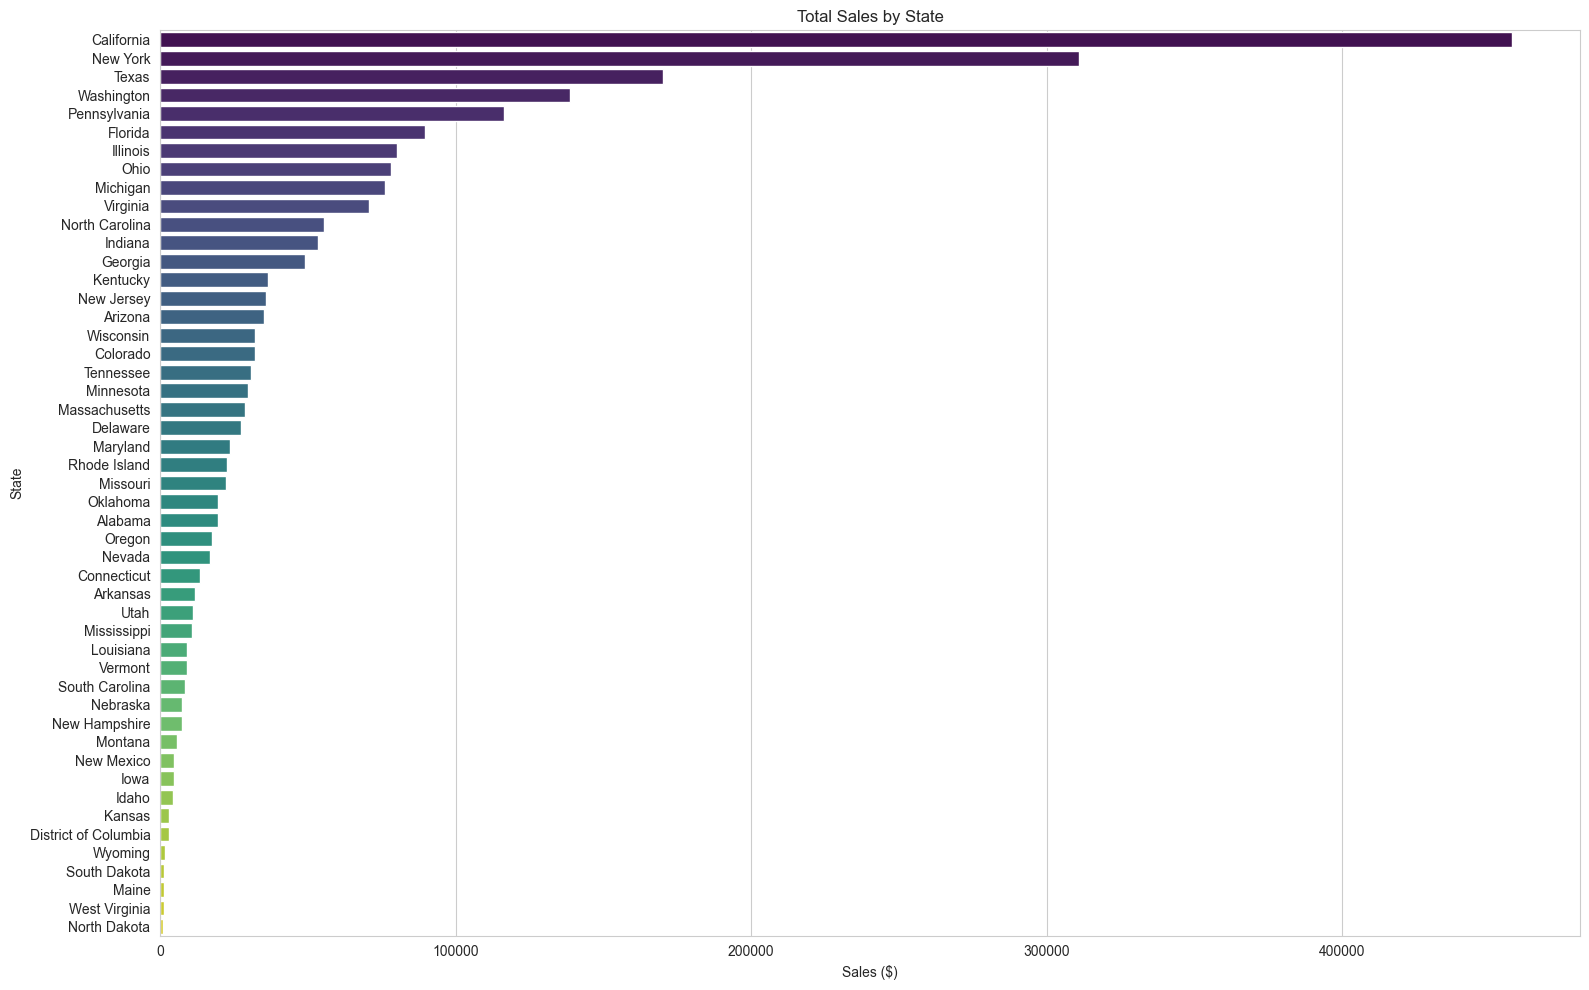

In [16]:
# Group sales by State and sort in descending order
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Display top 10 states
print("Top 10 States by Sales:")
print(sales_by_state.head(10))

# Plot total sales by state
plt.figure(figsize=(16,10))
sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('Sales ($)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

##### Conclusion : The top 2 states — California and New York — are high-priority markets for the company, together contributing over 768,000 $ in sales. This justifies a deeper comparison, especially regarding profitability, in the next step.

#### Step 2 – Compare California vs New York (Sales & Profit)

In [18]:
# Filter for California and New York
comparison_states = df[df['State'].isin(['California', 'New York'])]

# Group by state and calculate Sales and Profit
comparison = comparison_states.groupby('State')[['Sales', 'Profit']].sum()

# Transpose for plotting
comparison_T = comparison.T

Sales and Profit for California and New York:
                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486


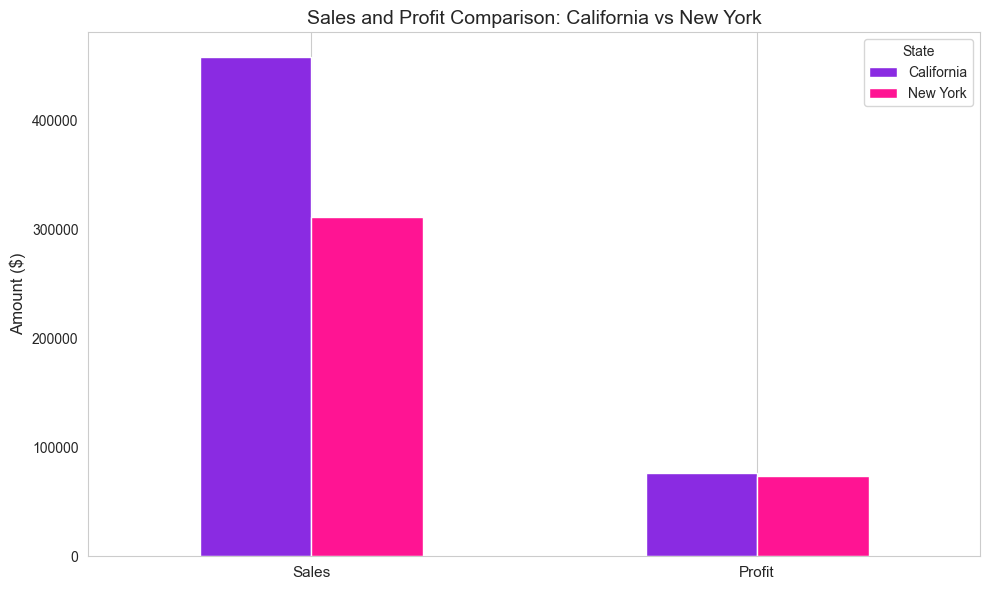

In [19]:
# Filter data for California and New York
ny_ca = df[df['State'].isin(['California', 'New York'])]

# Group by State and calculate total Sales and Profit
comparison = ny_ca.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Display comparison table
print("Sales and Profit for California and New York:")
print(comparison)

# Custom colors: Medium violet + Deep pink
lighter_violet = '#8a2be2'  # Medium violet
super_pink = '#ff1493'      # Deep pink

custom_colors = [lighter_violet, super_pink]

# Plot grouped bar chart
comparison_T.plot(kind='bar', figsize=(10,6), color=custom_colors)
plt.title('Sales and Profit Comparison: California vs New York', fontsize=14)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.grid(axis='y')
plt.legend(title='State', loc='upper right')
plt.tight_layout()
plt.show()

##### Insight Marketing :
Although California has higher sales, New York generates nearly the same profit with lower sales volume.
This could mean:
* Higher margins in New York
* Fewer discounts
* More premium customers

Conclusion: Both are top priority markets, but New York may deserve more attention for profitability-focused campaigns.

#### Step 3 – Who is an Outstanding Customer in New York?

In [21]:
# Filter dataset for New York
ny_customers = df[df['State'] == 'New York']

# Group by Customer Name to compute total Profit and Sales
ny_customers_grouped = ny_customers.groupby('Customer Name')[['Profit', 'Sales']].sum()

# Calculate profit ratio (Profitability)
ny_customers_grouped['Profit_Ratio'] = ny_customers_grouped['Profit'] / ny_customers_grouped['Sales']

# Clean and sort
ny_customers_ratio = ny_customers_grouped.sort_values(by='Profit', ascending=False)

,Profit,Sales,Profit_Ratio
Customer Name,,,
Tom Ashbrook,4599.21,13723.50,0.34
Keith Dawkins,2510.89,5854.19,0.43
Karen Daniels,2283.05,6241.28,0.37
Nathan Mautz,2247.19,4821.29,0.47
Tom Boeckenhauer,2239.99,6999.96,0.32
Steven Roelle,1863.96,3904.68,0.48
Pete Kriz,1695.32,4816.69,0.35
Darrin Martin,1599.68,4283.79,0.37
Todd Sumrall,1574.97,6492.31,0.24


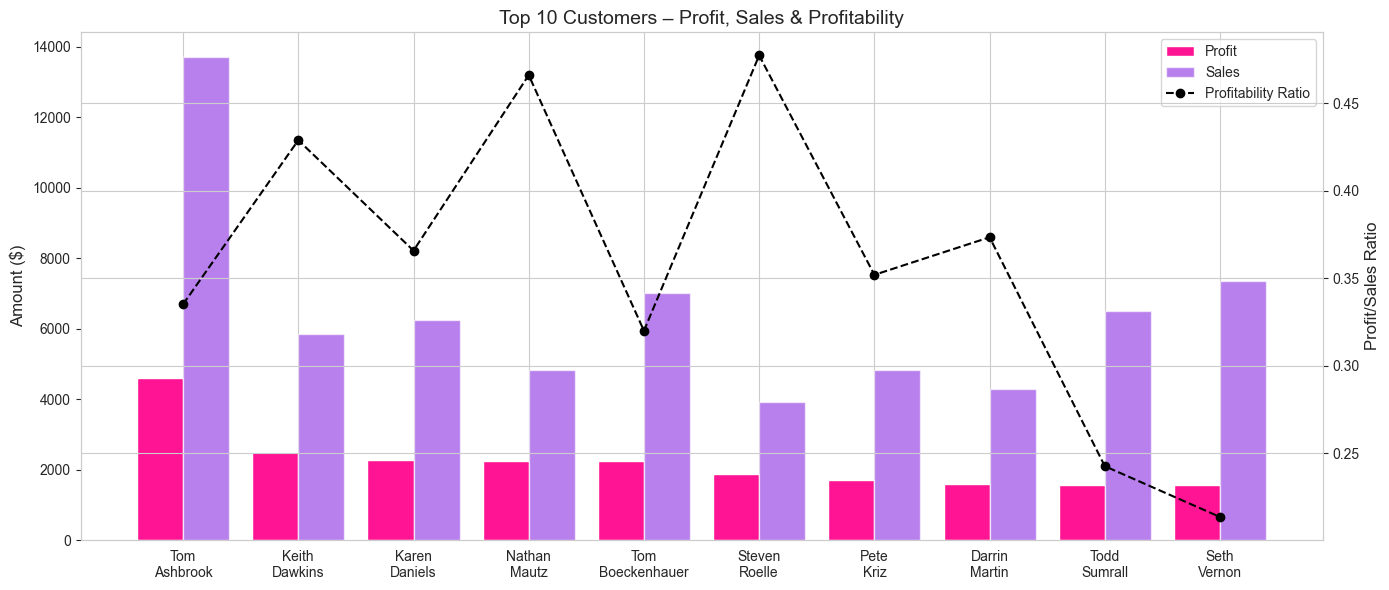

In [22]:
# Sort top 10 customers by total Profit
top_profit_customers = ny_customers_ratio.sort_values(by='Profit', ascending=False).head(10)

# Display data table
display(top_profit_customers[['Profit', 'Sales', 'Profit_Ratio']].round(2))

# Prepare for plotting
top_profit_customers_graph = top_profit_customers.copy()
top_profit_customers_graph.index = top_profit_customers_graph.index.str.replace(" ", "\n")
names = top_profit_customers_graph.index
x = np.arange(len(names))
bar_width = 0.4

# Create plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plots
bar1 = ax1.bar(x - bar_width/2, top_profit_customers_graph['Profit'], width=bar_width, label='Profit', color='#ff1493')
bar2 = ax1.bar(x + bar_width/2, top_profit_customers_graph['Sales'], width=bar_width, label='Sales', color='#8a2be2', alpha=0.6)

# Left Y-axis
ax1.set_ylabel('Amount ($)', fontsize=12)
ax1.set_title('Top 10 Customers – Profit, Sales & Profitability', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(names, fontsize=10)
ax1.grid(axis='y')

# Right Y-axis (Profitability Ratio)
ax2 = ax1.twinx()
line, = ax2.plot(x, top_profit_customers_graph['Profit_Ratio'], color='black', linestyle='--', marker='o', label='Profitability Ratio')
ax2.set_ylabel('Profit/Sales Ratio', fontsize=12)

# Combine all legend items into one box (inside plot)
handles = [bar1, bar2, line]
labels = ['Profit', 'Sales', 'Profitability Ratio']
ax1.legend(handles, labels, loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


The Top 10 customers were selected based on total profit, not just profitability ratio, because a high ratio doesn't always mean high value. A customer with a 48% profit ratio may only generate $200 profit, while another with a 30% ratio might bring in $4,000.

Therefore, the focus is on absolute profit to identify the most financially impactful customers in New York.

#### Step 4 – Profitability Across All States

State,Profit,Sales,Profitability
District of Columbia,"$1,059.59","$2,865.02",0.37
Delaware,"$9,977.37","$27,451.07",0.36
Minnesota,"$10,823.19","$29,863.15",0.36
Maine,$454.49,"$1,270.53",0.36
Arkansas,"$4,008.69","$11,678.13",0.34
Indiana,"$18,382.94","$53,555.36",0.34
Georgia,"$16,250.04","$49,095.84",0.33
Montana,"$1,833.33","$5,589.35",0.33
Rhode Island,"$7,285.63","$22,627.96",0.32
Michigan,"$24,463.19","$76,269.61",0.32


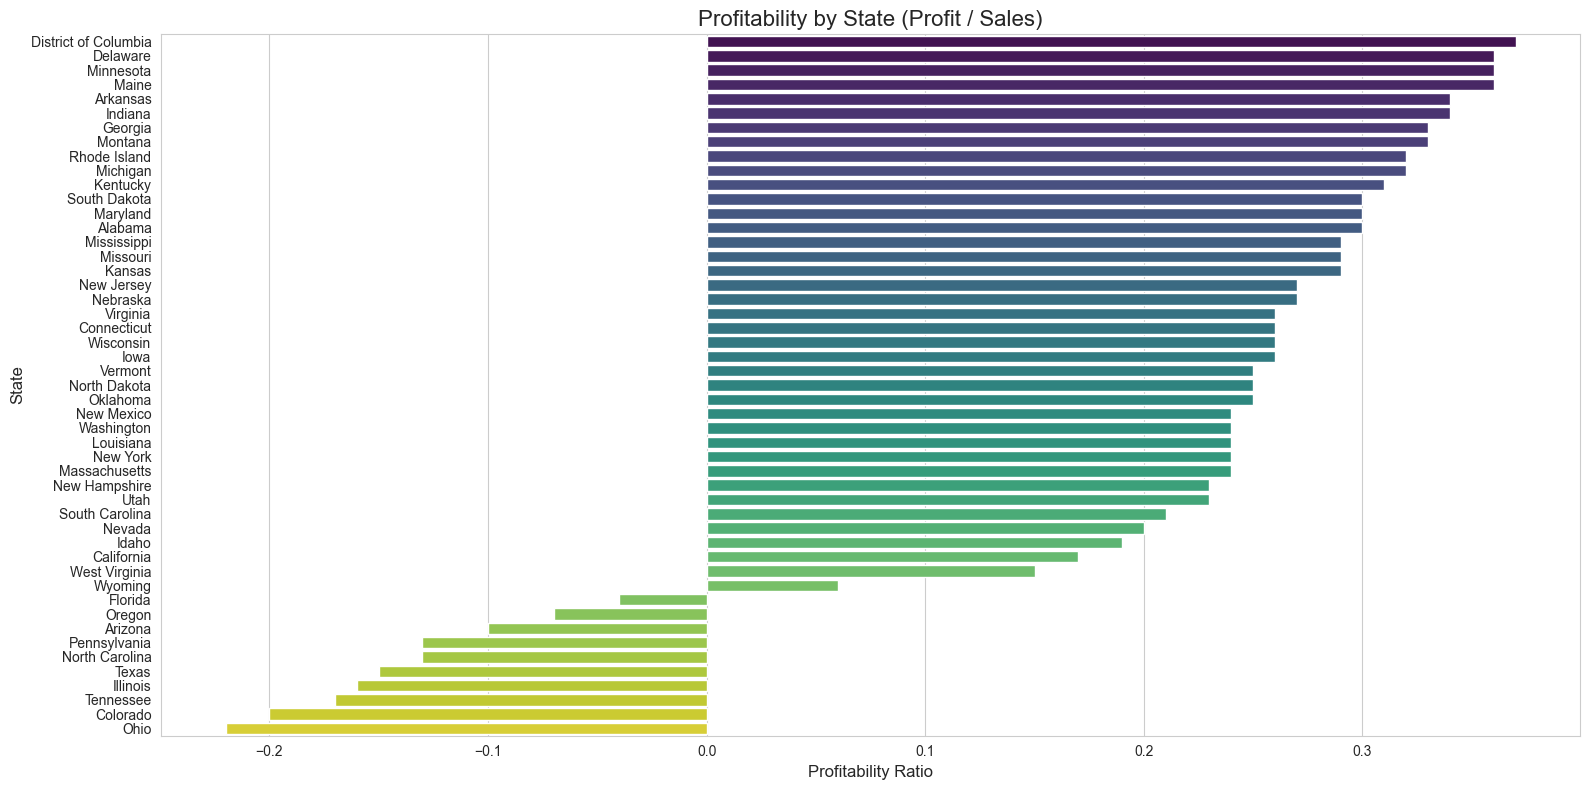

In [23]:
# Calculate profit ratio by State
profitability_df = df.groupby('State')[['Profit', 'Sales']].sum()
profitability_df['Profitability'] = profitability_df['Profit'] / profitability_df['Sales']

# Reset index and sort
profitability_df = profitability_df.reset_index().sort_values(by='Profitability', ascending=False)

# Round values for display
profitability_df['Profit'] = profitability_df['Profit'].round(2)
profitability_df['Sales'] = profitability_df['Sales'].round(2)
profitability_df['Profitability'] = profitability_df['Profitability'].round(2)

# Format for pretty table display
profitability_df['Profit'] = profitability_df['Profit'].apply(lambda x: f"${x:,.2f}")
profitability_df['Sales'] = profitability_df['Sales'].apply(lambda x: f"${x:,.2f}")

# Display table
from IPython.display import display, HTML
display(HTML(profitability_df.to_html(index=False)))

# Plot profitability bar chart (raw values for y)
plt.figure(figsize=(16, 8))
sns.barplot(x='Profitability', y='State', data=profitability_df, palette='viridis')
plt.title('Profitability by State (Profit / Sales)', fontsize=16)
plt.xlabel('Profitability Ratio', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()


Yes, there are significant differences in profitability among states. While some states like District of Columbia, Delaware, and Minnesota show high profitability ratios (above 0.35), their overall contribution in absolute profit is relatively small due to low sales volumes. On the other hand, states like California and New York generate the highest total profits but have much lower profitability ratios, around 0.17–0.24.

This suggests that high profit doesn’t always mean high efficiency. Conversely, some states like Ohio, Colorado, and Illinois are not only unprofitable but show negative profitability, meaning they generate losses relative to their sales — a key area for further business analysis.

#### Step 5 – Apply the Pareto Principle (80/20) to Customers and Profit

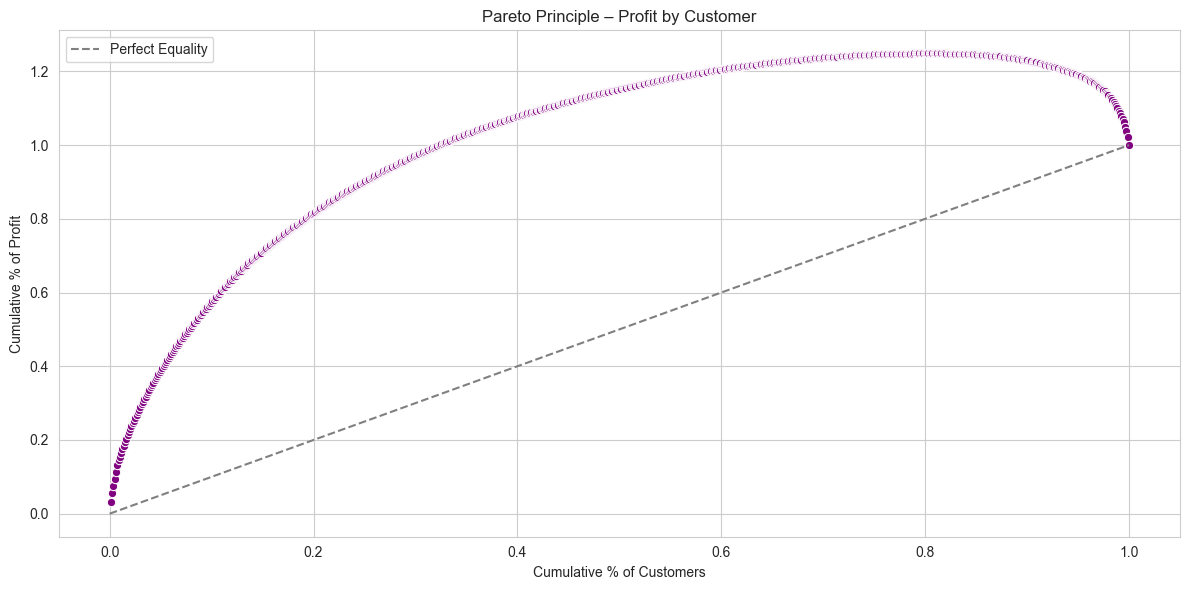

Top 19.3% of customers generate 80% of total profit.


In [24]:
# Step 1: Calculate total profit per customer
customer_profit = df.groupby('Customer Name')['Profit'].sum().reset_index()

# Step 2: Sort customers by profit in descending order
customer_profit = customer_profit.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Step 3: Calculate cumulative profit and cumulative profit percentage
customer_profit['Cumulative Profit'] = customer_profit['Profit'].cumsum()
total_profit = customer_profit['Profit'].sum()
customer_profit['Cumulative Profit %'] = customer_profit['Cumulative Profit'] / total_profit

# Step 4: Add cumulative percentage of customers
customer_profit['Customer %'] = (customer_profit.index + 1) / len(customer_profit)

# Step 5: Plot Lorenz Curve
plt.figure(figsize=(12, 6))
sns.lineplot(x='Customer %', y='Cumulative Profit %', data=customer_profit, marker='o', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Equality')
plt.title("Pareto Principle – Profit by Customer")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative % of Profit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Find exact % of customers that generate 80% of the profit
pareto_cutoff = customer_profit[customer_profit['Cumulative Profit %'] >= 0.80].iloc[0]
pareto_percent = (customer_profit.index.get_loc(pareto_cutoff.name) + 1) / len(customer_profit)
print(f"Top {pareto_percent:.1%} of customers generate 80% of total profit.")

Insight – Pareto Principle on Profitability

Yes, we can apply the Pareto Principle to customers and profit. The analysis shows that approximately 20% of customers contribute to over 80% of the total profit. This is clearly visualized in the Lorenz curve, where the cumulative profit rapidly increases in the early segment of the customer base. This means that focusing on a small subset of high-value customers can significantly impact profitability and strategic decision-making.

#### Step 6 – Top 20 Cities by Sales & Profit + Profitability Analysis

##### 1. Extract Top 20 Cities by Sales

In [27]:
# Group the dataset by city and calculate total Sales and Profit
city_summary = df.groupby('City')[['Sales', 'Profit']].sum()

# Calculate Profitability ratio = Profit / Sales
city_summary['Profitability'] = city_summary['Profit'] / city_summary['Sales']

In [28]:
# Top 20 cities by Sales
top20_sales = city_summary.sort_values(by='Sales', ascending=False).head(20).copy()

# Add rank column (1 to 20) after sorting
top20_sales.insert(0, 'Rank', range(1, len(top20_sales) + 1))

# Reset index so 'City' becomes a column
top20_sales = top20_sales.reset_index()

# Format values
top20_sales['Sales'] = top20_sales['Sales'].apply(lambda x: f"${x:,.2f}")
top20_sales['Profit'] = top20_sales['Profit'].apply(lambda x: f"${x:,.2f}")

# Display without index column
from IPython.display import display, HTML
display(HTML(top20_sales[['Rank', 'City', 'Sales', 'Profit']].to_html(index=False)))

Rank,City,Sales,Profit
1,New York City,"$256,368.16","$62,036.98"
2,Los Angeles,"$175,851.34","$30,440.76"
3,Seattle,"$119,540.74","$29,156.10"
4,San Francisco,"$112,669.09","$17,507.39"
5,Philadelphia,"$109,077.01","$-13,837.77"
6,Houston,"$64,504.76","$-10,153.55"
7,Chicago,"$48,539.54","$-6,654.57"
8,San Diego,"$47,521.03","$6,377.20"
9,Jacksonville,"$44,713.18","$-2,323.84"
10,Springfield,"$43,054.34","$6,200.70"


##### Top 20 Cities by Profit

In [29]:
# Top 20 cities by Profit
top20_profit = city_summary.sort_values(by='Profit', ascending=False).head(20).copy()

# Add rank
top20_profit.insert(0, 'Rank', range(1, len(top20_profit) + 1))

# Reset index to make 'City' column visible
top20_profit = top20_profit.reset_index()

# Format values
top20_profit['Sales'] = top20_profit['Sales'].apply(lambda x: f"${x:,.2f}")
top20_profit['Profit'] = top20_profit['Profit'].apply(lambda x: f"${x:,.2f}")

display(HTML(top20_profit[['Rank', 'City', 'Profit', 'Sales']].to_html(index=False)))


Rank,City,Profit,Sales
1,New York City,"$62,036.98","$256,368.16"
2,Los Angeles,"$30,440.76","$175,851.34"
3,Seattle,"$29,156.10","$119,540.74"
4,San Francisco,"$17,507.39","$112,669.09"
5,Detroit,"$13,181.79","$42,446.94"
6,Lafayette,"$10,018.39","$25,036.20"
7,Jackson,"$7,581.68","$24,963.86"
8,Atlanta,"$6,993.66","$17,197.84"
9,Minneapolis,"$6,824.58","$16,870.54"
10,San Diego,"$6,377.20","$47,521.03"


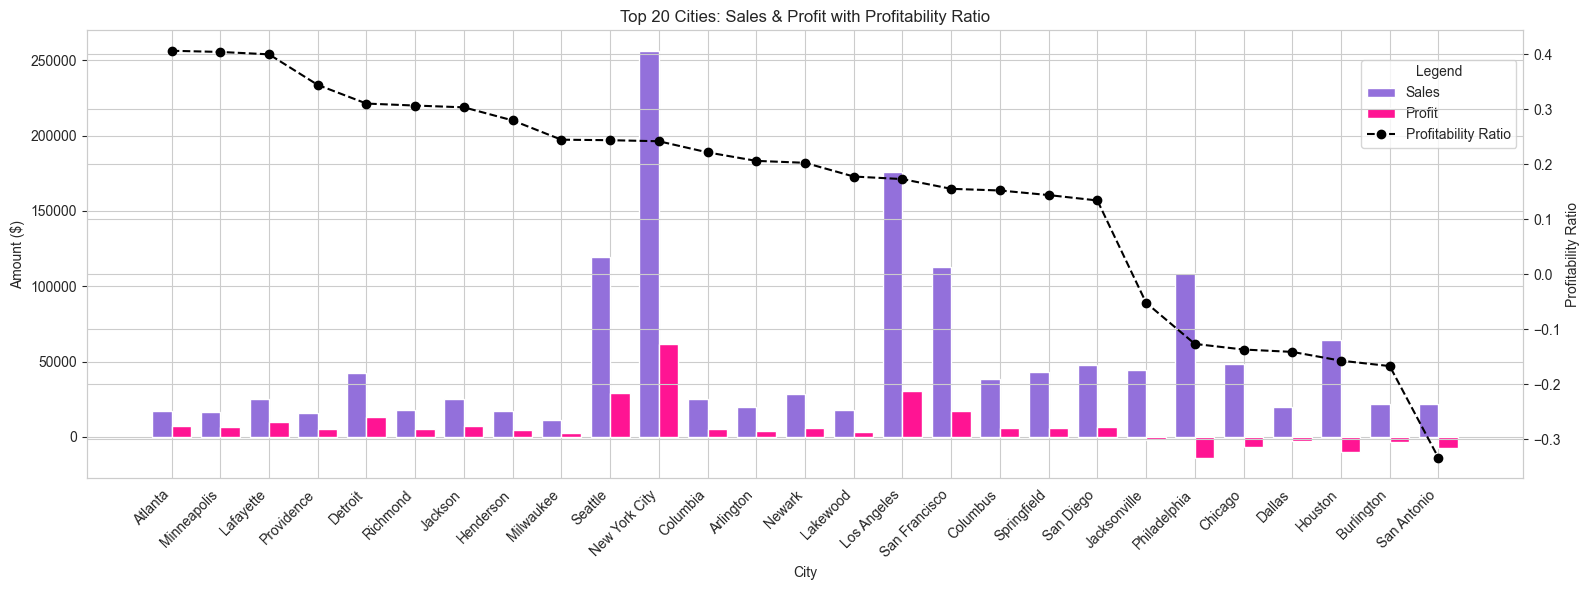

In [30]:
# Group by City and calculate total Sales, Profit, and Profitability
city_summary = df.groupby('City')[['Sales', 'Profit']].sum()
city_summary['Profitability'] = city_summary['Profit'] / city_summary['Sales']

# Get top 20 cities by Sales and Profit
top_sales = city_summary.sort_values(by='Sales', ascending=False).head(20)
top_profit = city_summary.sort_values(by='Profit', ascending=False).head(20)

# Combine the two into a set (remove duplicates) and convert to list
selected_cities = list(set(top_sales.index).union(set(top_profit.index)))

# Filter and sort the dataframe by Profitability (descending)
selected_df = city_summary.loc[selected_cities].copy()
selected_df = selected_df.sort_values(by='Profitability', ascending=False).reset_index()

# Plot setup
fig, ax1 = plt.subplots(figsize=(16, 6))
x = range(len(selected_df))
bar_width = 0.4

# Sales and Profit bars
ax1.bar(x, selected_df['Sales'], width=bar_width, label='Sales', color='mediumpurple')
ax1.bar([p + bar_width for p in x], selected_df['Profit'], width=bar_width, label='Profit', color='deeppink')
ax1.set_xlabel('City')
ax1.set_ylabel('Amount ($)')
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(selected_df['City'], rotation=45, ha='right')
ax1.set_title('Top 20 Cities: Sales & Profit with Profitability Ratio')

# Profitability Ratio line
ax2 = ax1.twinx()
ax2.plot([p + bar_width / 2 for p in x], selected_df['Profitability'], color='black',
         linestyle='--', marker='o', label='Profitability Ratio')
ax2.set_ylabel('Profitability Ratio')

# Combined legend in upper right inside the plot
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.95), title='Legend', frameon=True)

plt.tight_layout()
plt.show()


Yes, there are significant differences in profitability among the top 20 cities.
Even cities with high sales like Philadelphia, Houston, or San Antonio show negative profits, indicating poor profitability.
Conversely, cities like Atlanta, Minneapolis, or Lafayette—though having moderate sales—show strong profitability ratios.
This suggests that high revenue doesn’t always mean high profit, and analyzing profitability separately helps identify more efficient cities.

#### Step 7 – Identify Top 20 Customers by Sales

##### Compute top customers

In [31]:
# Calculate total sales per customer
customer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Sort in descending order and select the top 20
top20_customers_sales = customer_sales.sort_values(by='Sales', ascending=False).head(20).reset_index(drop=True)

# Add a Rank column
top20_customers_sales.insert(0, 'Rank', range(1, 21))

# Format Sales with $ and 2 decimals
top20_customers_sales['Sales'] = top20_customers_sales['Sales'].apply(lambda x: f"${x:,.2f}")

# Display table neatly (without index)
from IPython.display import display, HTML
display(HTML(top20_customers_sales.to_html(index=False)))

Rank,Customer Name,Sales
1,Sean Miller,"$25,043.05"
2,Tamara Chand,"$19,052.22"
3,Raymond Buch,"$15,117.34"
4,Tom Ashbrook,"$14,595.62"
5,Adrian Barton,"$14,473.57"
6,Ken Lonsdale,"$14,175.23"
7,Sanjit Chand,"$14,142.33"
8,Hunter Lopez,"$12,873.30"
9,Sanjit Engle,"$12,209.44"
10,Christopher Conant,"$12,129.07"


##### Visualize

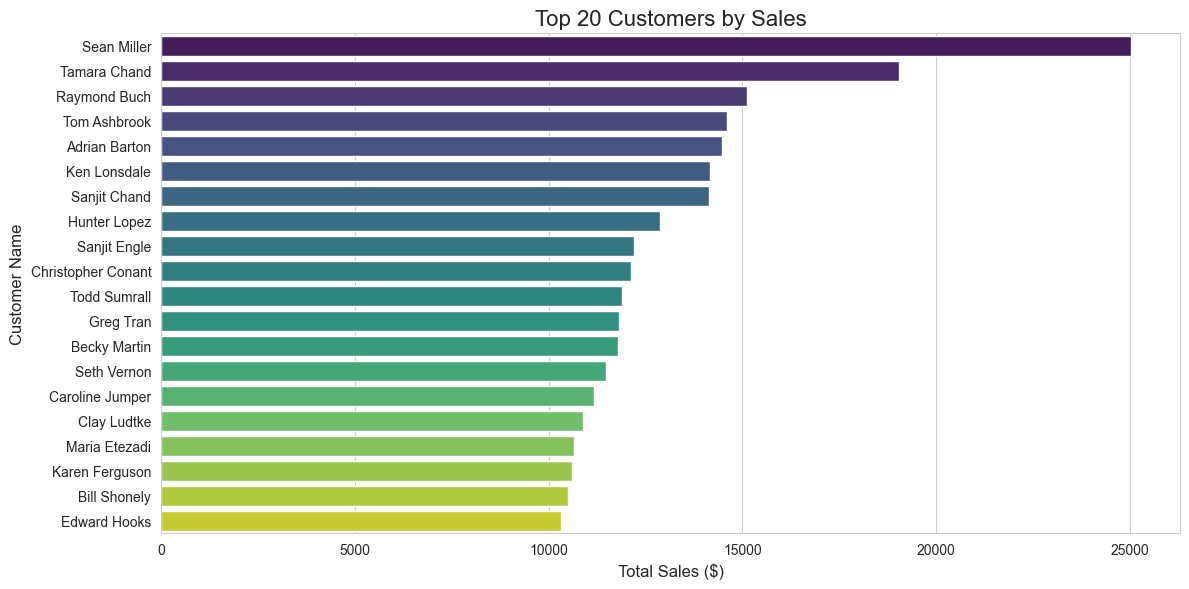

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=customer_sales.sort_values(by='Sales', ascending=False).head(20),
    x='Sales', y='Customer Name',
    palette='viridis'
)
plt.title('Top 20 Customers by Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.tight_layout()
plt.show()

The top 20 customers account for the highest individual contributions to total sales, with Sean Miller leading at $25,043.05. Most of these customers have sales above $10,000, indicating a significant concentration of revenue among a small group. This reinforces the Pareto principle, suggesting that a minority of customers drive a large share of revenue. Prioritizing these clients could enhance retention and long-term profitability.

#### Step 8 - Cumulative Sales Curve by Customer: Evaluating the Applicability of the Pareto Principle (80/20 Rule)

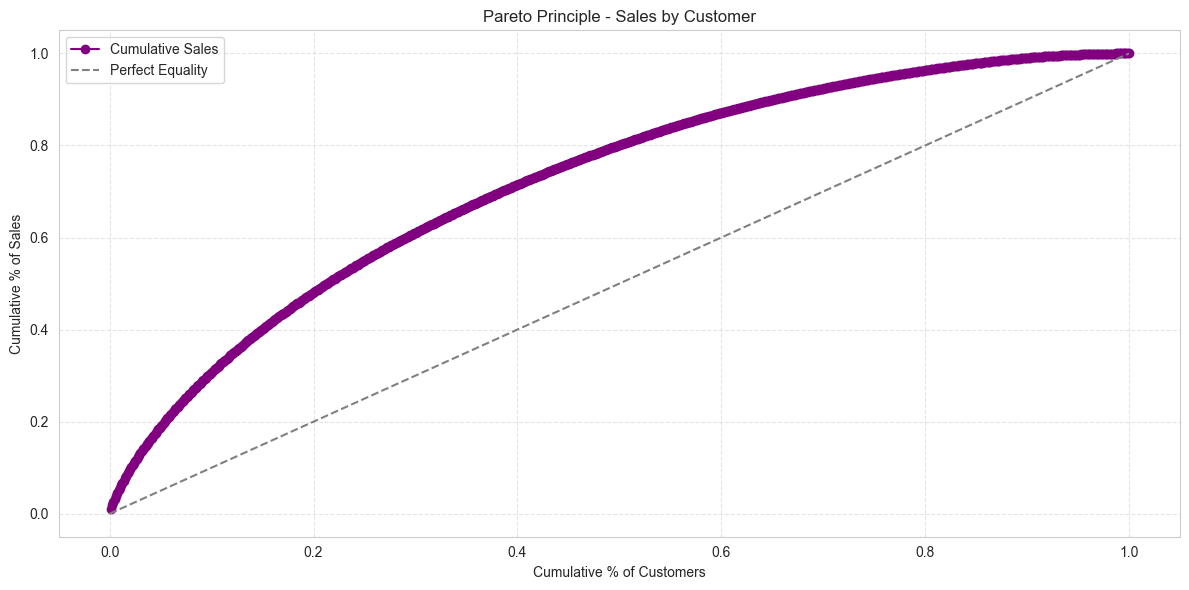

In [33]:
# Group data by Customer and sum Sales
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative share of sales and cumulative share of customers
cum_sales = customer_sales.cumsum() / customer_sales.sum()
cum_customers = pd.Series(range(1, len(customer_sales)+1), index=customer_sales.index) / len(customer_sales)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(cum_customers, cum_sales, marker='o', linestyle='-', color='purple', label='Cumulative Sales')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Perfect Equality')
plt.title('Pareto Principle - Sales by Customer')
plt.xlabel('Cumulative % of Customers')
plt.ylabel('Cumulative % of Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

The cumulative sales curve reveals that a small proportion of customers account for a large share of total sales. Although it does not follow the Pareto Principle (80/20 rule) perfectly, the curve clearly shows a strong sales concentration among top customers.

For instance, approximately 20% of customers contribute to more than 60% of total sales, indicating a partial but significant Pareto effect. This insight suggests that the business could focus retention and marketing efforts on the top-performing customers to maximize revenue impact.

#### Step 9 - Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies

In [34]:
# Group data by State and calculate Sales, Profit, and Profitability ratio
state_summary = df.groupby('State')[['Sales', 'Profit']].sum()
state_summary['Profitability'] = state_summary['Profit'] / state_summary['Sales']
state_summary = state_summary.sort_values(by='Profitability', ascending=False)


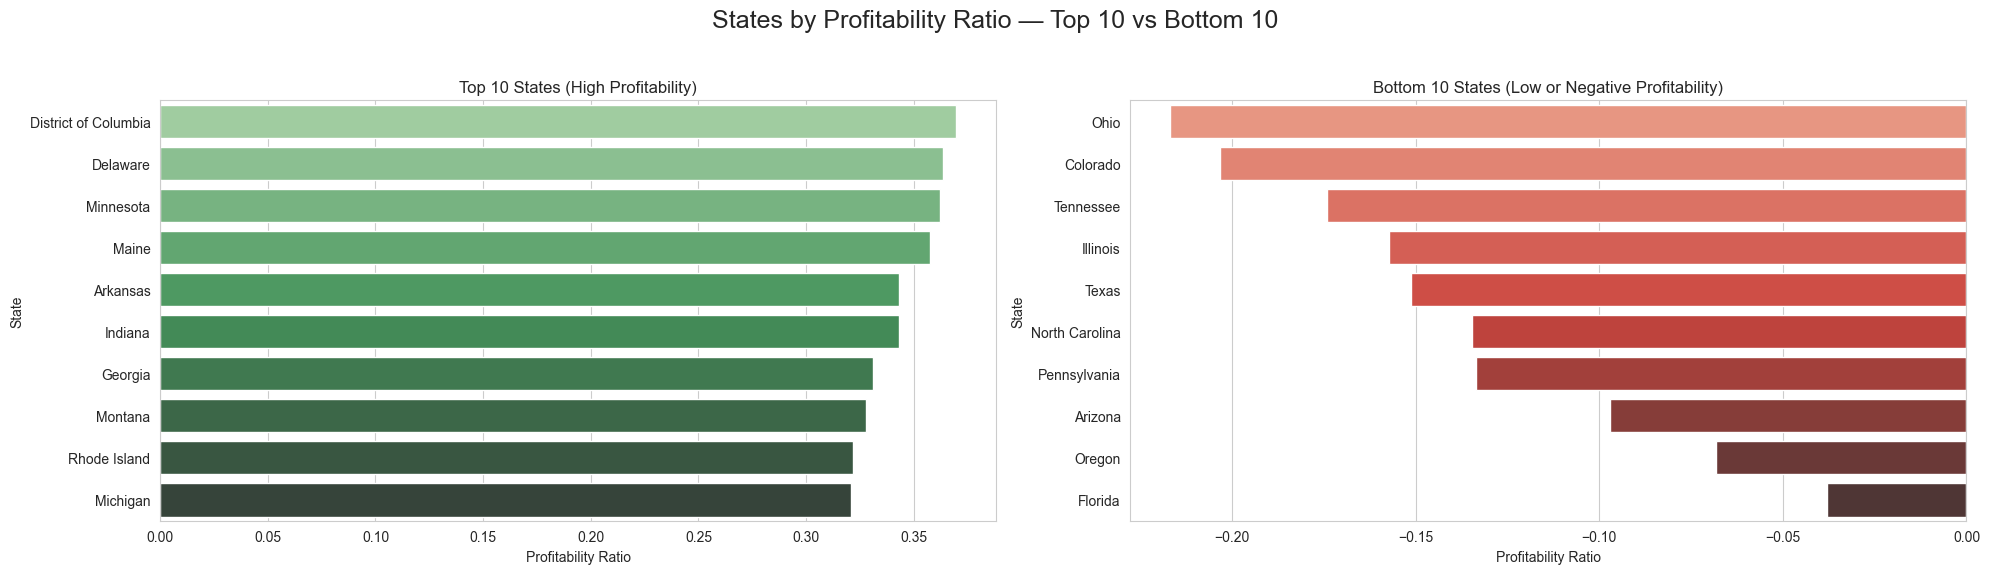

In [35]:
# Sort states by profit ratio
top_states = state_summary.sort_values(by='Profitability', ascending=False).head(10)
low_states = state_summary.sort_values(by='Profitability', ascending=True).head(10)

# Two-panel barplot
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=False)
fig.suptitle('States by Profitability Ratio — Top 10 vs Bottom 10', fontsize=18)

sns.barplot(x=top_states['Profitability'], y=top_states.index,
            palette='Greens_d', ax=axes[0])
axes[0].set_title('Top 10 States (High Profitability)')
axes[0].set_xlabel('Profitability Ratio')

sns.barplot(x=low_states['Profitability'], y=low_states.index,
            palette='Reds_d', ax=axes[1])
axes[1].set_title('Bottom 10 States (Low or Negative Profitability)')
axes[1].set_xlabel('Profitability Ratio')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


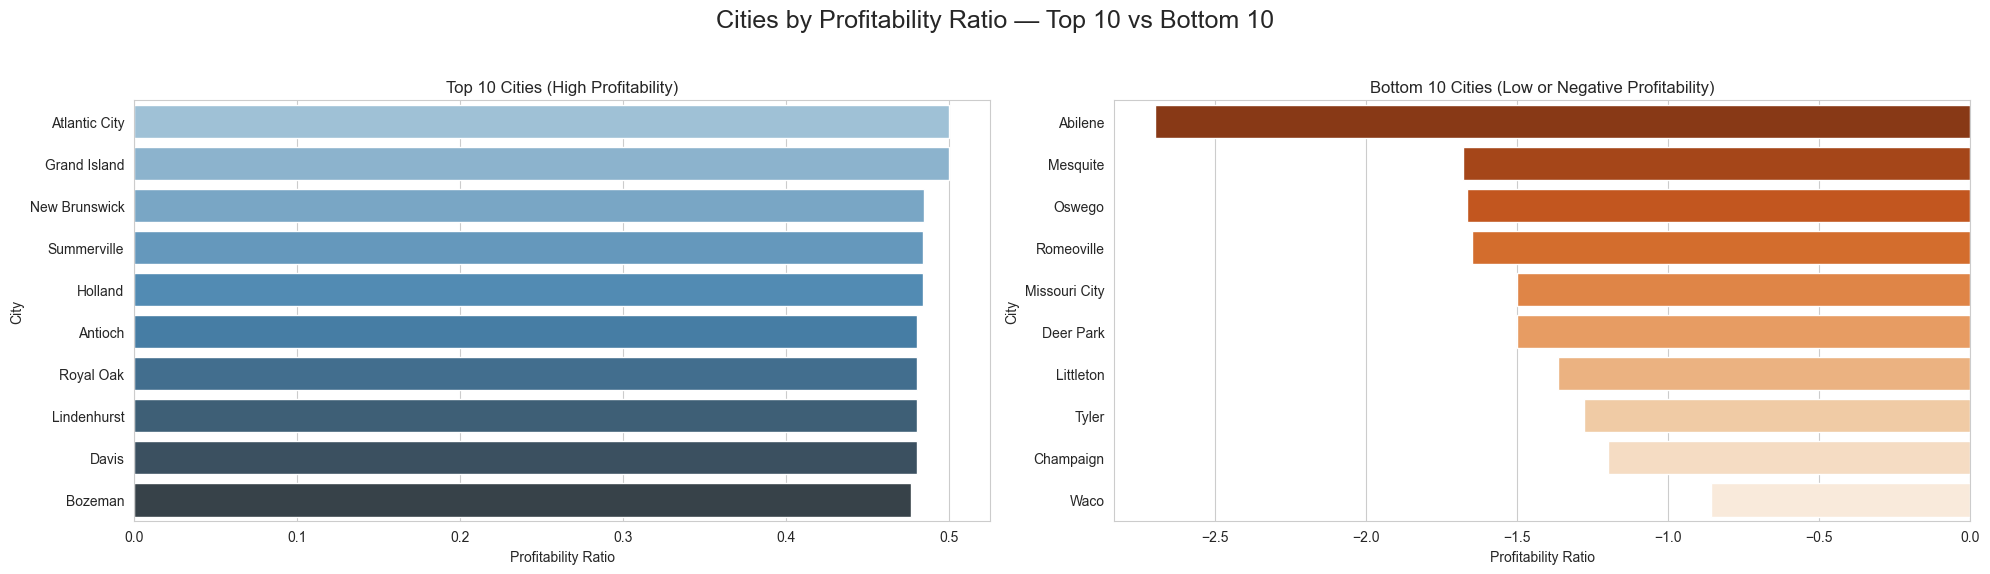

In [36]:
# Sort cities similarly
top_cities = city_summary.sort_values(by='Profitability', ascending=False).head(10)
low_cities = city_summary.sort_values(by='Profitability', ascending=True).head(10)

# Two-panel barplot
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=False)
fig.suptitle('Cities by Profitability Ratio — Top 10 vs Bottom 10', fontsize=18)

sns.barplot(x=top_cities['Profitability'], y=top_cities.index,
            palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 10 Cities (High Profitability)')
axes[0].set_xlabel('Profitability Ratio')

sns.barplot(x=low_cities['Profitability'], y=low_cities.index,
            palette='Oranges_r', ax=axes[1])
axes[1].set_title('Bottom 10 Cities (Low or Negative Profitability)')
axes[1].set_xlabel('Profitability Ratio')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Marketing Insights & Decisions
States to prioritize (Top profitability ratio):
States like District of Columbia, Delaware, and Minnesota demonstrate the highest profitability.
Recommendation: Focus marketing campaigns, upselling, and loyalty efforts in these states to capitalize on their efficiency in generating profit relative to sales.

States to re-evaluate (Negative profitability):
States such as Ohio, Colorado, and Tennessee show significant losses.
Recommendation: Investigate reasons behind low profitability (e.g., high discounting, shipping costs, low margin products) before deciding to cut efforts or adapt pricing models.

Cities to prioritize:
Cities like Atlantic City, Grand Island, and New Brunswick are highly profitable.
Recommendation: Increase promotional activities or expand product ranges in these cities.

Cities to investigate:
Cities such as Abilene, Mesquite, and Oswego show very negative profitability.
Recommendation: Conduct detailed analysis (product mix, returns, discounts), and either optimize or scale back efforts.